In [8]:
from data.poisson_data import PoissonTimeShiftedData
import matplotlib.pyplot as plt
from data.reshape_data import train_test_split
from utils.rbm_vs_rtrbm import train_rbm_rtrbm, compare_moments_trained
import torch
from utils.plots import *

In [2]:
poisson = PoissonTimeShiftedData(n_batches=1, n_populations=40, time_steps_per_batch=1000, frequency_range=[4, 40])

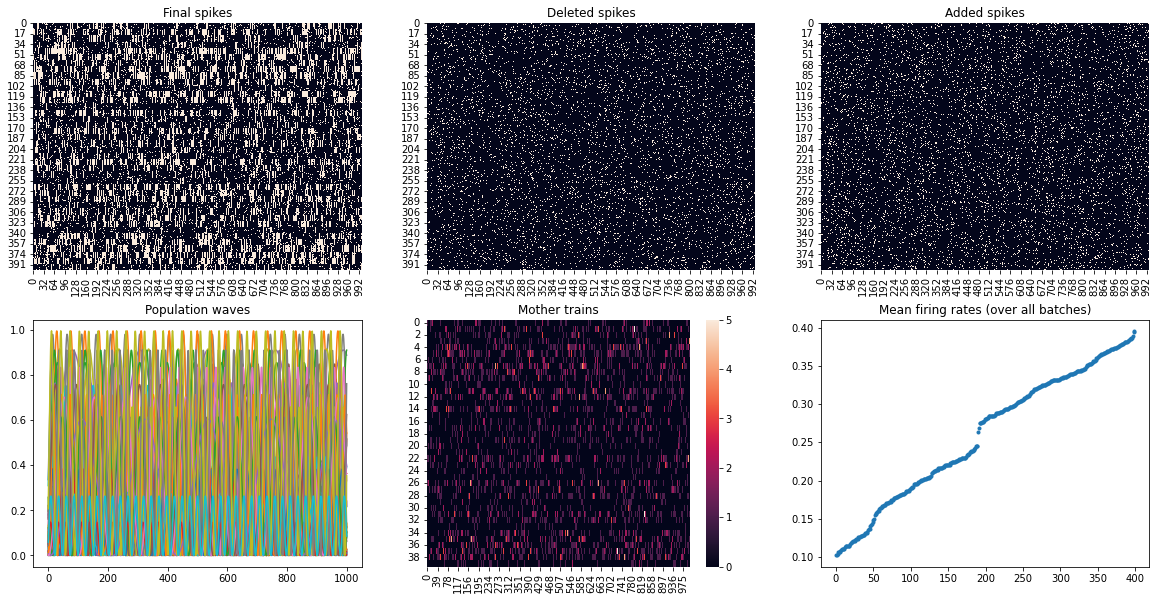

In [3]:
poisson.plot_stats()
plt.show()

In [4]:
# split into train and test
train, test = train_test_split(poisson.data.squeeze(), train_batches=7, test_batches=3)

In [9]:
# train rbm and rtrbm
rbm, rtrbm = train_rbm_rtrbm(
    train_data=train,
    N_H=40,
    save_path='../../results/Poisson Artificial Data/40 populations 1 batch',
    return_machines=True,
    debug_mode=True,
    device='cuda',
    n_epochs=200,
    lr_schedule='linear_decay',
    min_lr=1e-5,
    max_lr=1e-3,
    batch_size=1
)

training RBM...


100%|██████████| 200/200 [05:03<00:00,  1.52s/it]


saving RBM...
training RTRBM...


100%|██████████| 200/200 [01:22<00:00,  2.43it/s]


saving RTRBM...


inferring and calculating moments for RBM...


100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


inferring and calculating moments for RTRBM...


100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


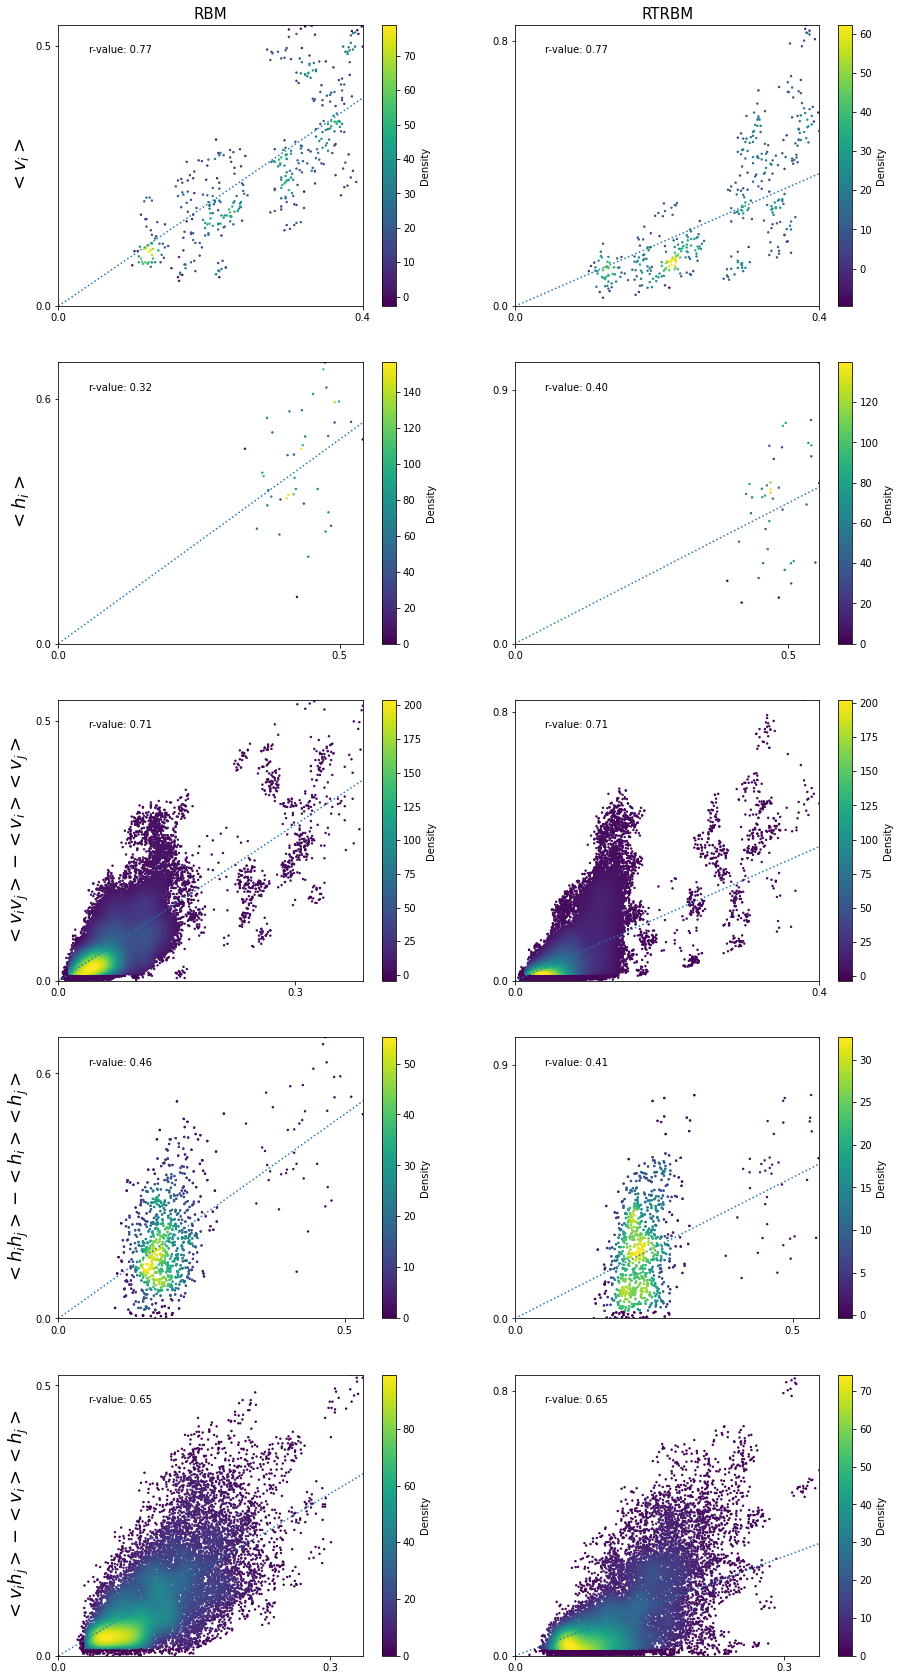

In [24]:
ax, res_rbm, res_rtrbm = compare_moments_trained(
    path='../../results/Poisson Artificial Data/40 populations 1 batch',
    test_set=train,
    pre_gibbs_k=0,
    gibbs_k=10
)
plt.show()

<AxesSubplot:>

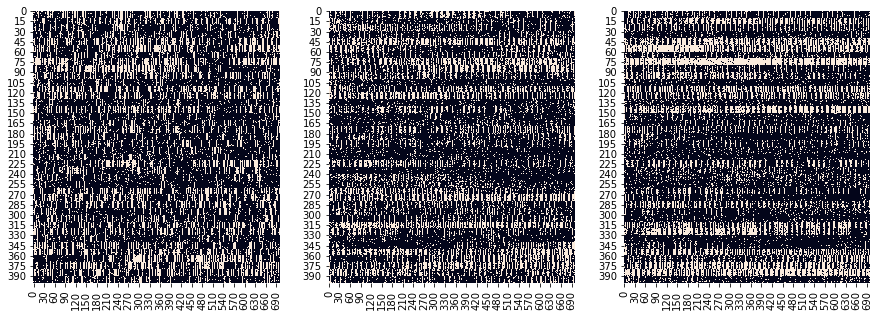

In [26]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(res_rbm[0], ax=axes[0], cbar=False)
sns.heatmap(res_rbm[1], ax=axes[1], cbar=False)
sns.heatmap(res_rtrbm[1], ax=axes[2], cbar=False)

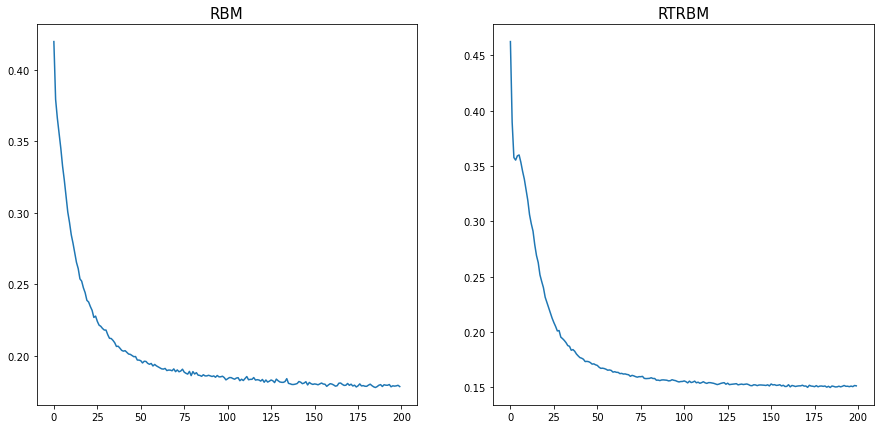

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].plot(rbm.errors)
axes[0].set_title('RBM', fontsize=15)
axes[1].set_title('RTRBM', fontsize=15)
axes[1].plot([err.cpu() for err in rtrbm.errors])
plt.show()

In [23]:
poisson0 = PoissonTimeShiftedData(n_batches=1, n_populations=4, neurons_per_population=20, time_steps_per_batch=100, frequency_range=[2, 5], temporal_connections=torch.zeros(4, 4))

In [7]:
train, test = train_test_split(poisson0.data.squeeze(), train_batches=80, test_batches=20)

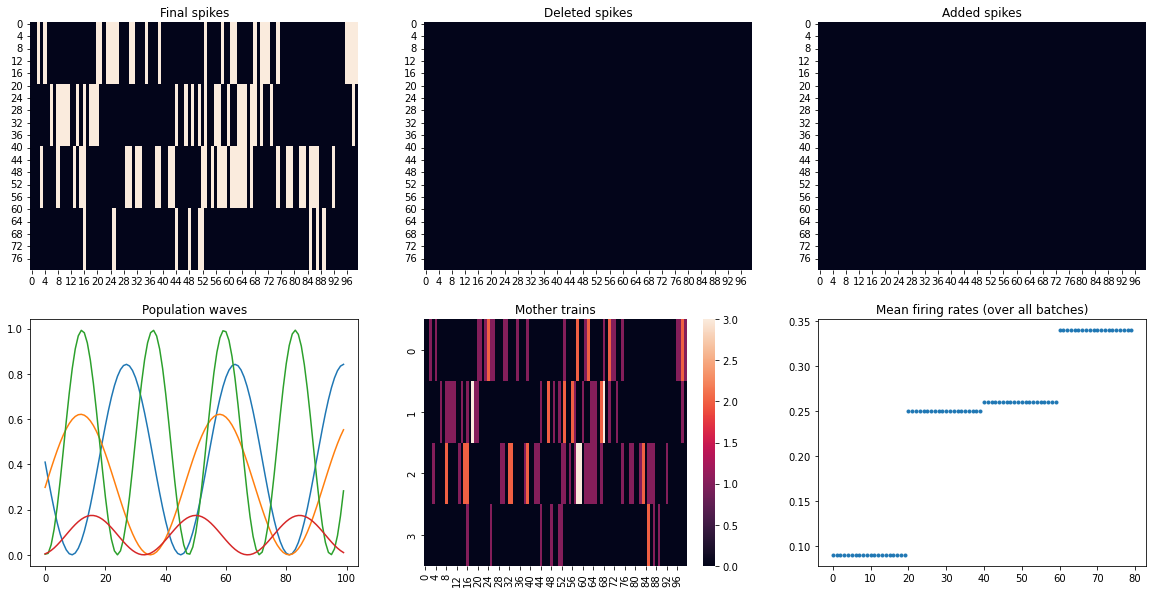

In [24]:
poisson0.plot_stats()
plt.savefig('../../figures/poisson_data_stats.png', dpi=200)
plt.show()

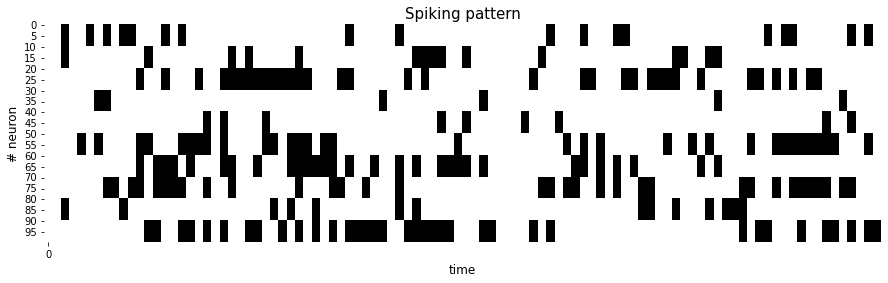

In [12]:
raster_plot(train[:100, :, 0])
plt.show()